# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/forecast"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = {"q":city,"appid":weather_api_key,"units":"metric"}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(url,params=city_url).json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["city"]["coord"]["lat"]
        city_lng = city_weather["city"]["coord"]["lon"]
        city_max_temp = city_weather ["list"][0] ["main"]["temp_max"]
        city_humidity = city_weather ["list"][0] ["main"]["humidity"]
        city_clouds = city_weather ["list"][0] ["clouds"]["all"]
        city_wind = city_weather ["list"][0] ["wind"]["speed"]
        city_country = city_weather ["city"]["country"]
        city_date = city_weather ["list"][0] ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print (e)
        print("City not found. Skipping...")
        pass
       
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bermeo
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | grand river south east
'city'
City not found. Skipping...
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | kourou
Processing Record 8 of Set 1 | barmer
Processing Record 9 of Set 1 | sorland
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | moshenskoye
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | san cristobal
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | saleaula
'city'
City not found. Skipping...
Processing Record 21 of Set

Processing Record 35 of Set 4 | high level
Processing Record 36 of Set 4 | waipawa
Processing Record 37 of Set 4 | santo domingo
Processing Record 38 of Set 4 | fort nelson
Processing Record 39 of Set 4 | benalla
Processing Record 40 of Set 4 | te anau
Processing Record 41 of Set 4 | zuwarah
Processing Record 42 of Set 4 | onega
Processing Record 43 of Set 4 | bang saphan
Processing Record 44 of Set 4 | berlevag
Processing Record 45 of Set 4 | yellowknife
Processing Record 46 of Set 4 | gobabis
Processing Record 47 of Set 4 | pinega
Processing Record 48 of Set 4 | sorvag
'city'
City not found. Skipping...
Processing Record 49 of Set 4 | bambous virieux
Processing Record 0 of Set 5 | sentyabrskiy
'city'
City not found. Skipping...
Processing Record 1 of Set 5 | dimitrovgrad
Processing Record 2 of Set 5 | muli
Processing Record 3 of Set 5 | kloulklubed
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | puerto escondido
Processing Record 6 of Set 5 | esperance
Pr

Processing Record 19 of Set 8 | maine-soroa
Processing Record 20 of Set 8 | kahului
Processing Record 21 of Set 8 | bonavista
Processing Record 22 of Set 8 | mangai
Processing Record 23 of Set 8 | changde
Processing Record 24 of Set 8 | faanui
Processing Record 25 of Set 8 | yeppoon
Processing Record 26 of Set 8 | port lincoln
Processing Record 27 of Set 8 | dubbo
Processing Record 28 of Set 8 | diego de almagro
Processing Record 29 of Set 8 | coruripe
Processing Record 30 of Set 8 | paso de carrasco
Processing Record 31 of Set 8 | balkanabat
Processing Record 32 of Set 8 | torbay
Processing Record 33 of Set 8 | kichera
Processing Record 34 of Set 8 | envira
Processing Record 35 of Set 8 | kirensk
Processing Record 36 of Set 8 | rio grande
Processing Record 37 of Set 8 | lagoa
Processing Record 38 of Set 8 | loa janan
Processing Record 39 of Set 8 | taree
Processing Record 40 of Set 8 | svetlogorsk
Processing Record 41 of Set 8 | villa constitucion
Processing Record 42 of Set 8 | cuilu

Processing Record 4 of Set 12 | mangrol
Processing Record 5 of Set 12 | pemberton
Processing Record 6 of Set 12 | macaboboni
'city'
City not found. Skipping...
Processing Record 7 of Set 12 | venado tuerto
Processing Record 8 of Set 12 | eirunepe
Processing Record 9 of Set 12 | ewa beach
Processing Record 10 of Set 12 | labuan
Processing Record 11 of Set 12 | ngunguru
Processing Record 12 of Set 12 | tual
Processing Record 13 of Set 12 | tecolutla
Processing Record 14 of Set 12 | george town
Processing Record 15 of Set 12 | kununurra
Processing Record 16 of Set 12 | bikaner
Processing Record 17 of Set 12 | dombarovskiy
Processing Record 18 of Set 12 | ballina
Processing Record 19 of Set 12 | maloshuyka
'city'
City not found. Skipping...
Processing Record 20 of Set 12 | belyy yar
Processing Record 21 of Set 12 | forestville
Processing Record 22 of Set 12 | vallenar
Processing Record 23 of Set 12 | brigantine
Processing Record 24 of Set 12 | ambanja
Processing Record 25 of Set 12 | augus

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bermeo,43.4209,-2.7215,9.93,71,97,6.60,ES,1675641600
1,tuktoyaktuk,69.4541,-133.0374,-38.59,66,20,2.61,CA,1675641600
2,khatanga,71.9667,102.5000,-36.90,100,55,3.00,RU,1675641600
3,punta arenas,-53.1500,-70.9167,13.06,47,40,5.95,CL,1675641600
4,kaitangata,-46.2817,169.8464,19.24,58,69,8.05,NZ,1675641600


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bermeo,43.4209,-2.7215,9.93,71,97,6.60,ES,1675641600
1,tuktoyaktuk,69.4541,-133.0374,-38.59,66,20,2.61,CA,1675641600
2,khatanga,71.9667,102.5000,-36.90,100,55,3.00,RU,1675641600
3,punta arenas,-53.1500,-70.9167,13.06,47,40,5.95,CL,1675641600
4,kaitangata,-46.2817,169.8464,19.24,58,69,8.05,NZ,1675641600


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

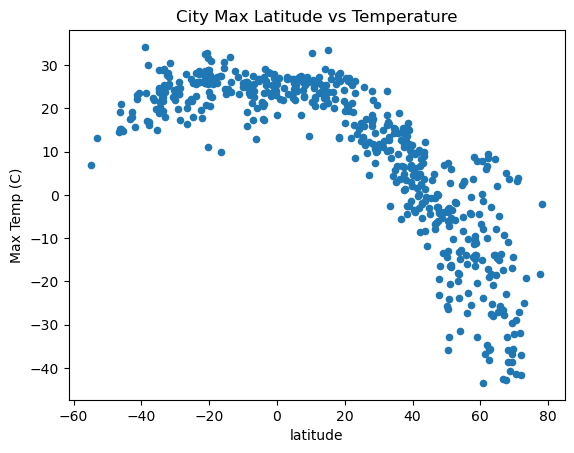

In [23]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter ("Lat","Max Temp", title = "City Max Latitude vs Temperature", xlabel= "latitude", ylabel= "Max Temp (C)")

# Incorporate the other graph properties

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

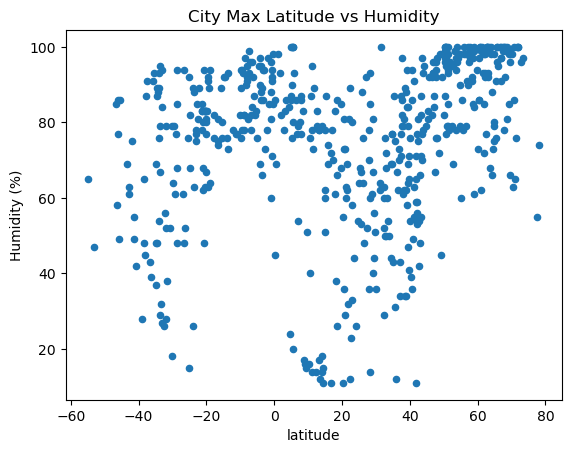

In [25]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter ("Lat","Humidity", title = "City Max Latitude vs Humidity", xlabel= "latitude", ylabel= "Humidity (%)")

# Incorporate the other graph properties

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

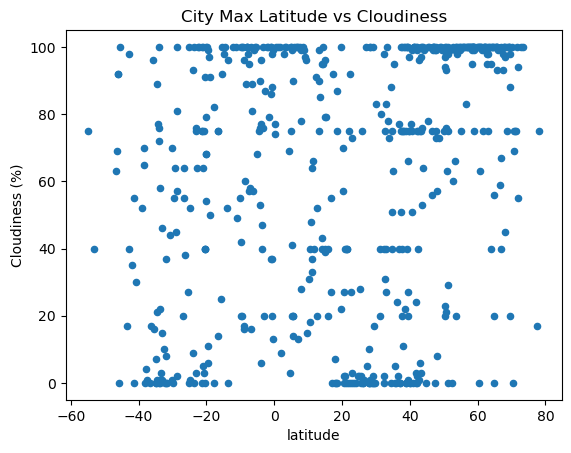

In [26]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter ("Lat","Cloudiness", title = "City Max Latitude vs Cloudiness", xlabel= "latitude", ylabel= "Cloudiness (%)")

# Incorporate the other graph properties

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

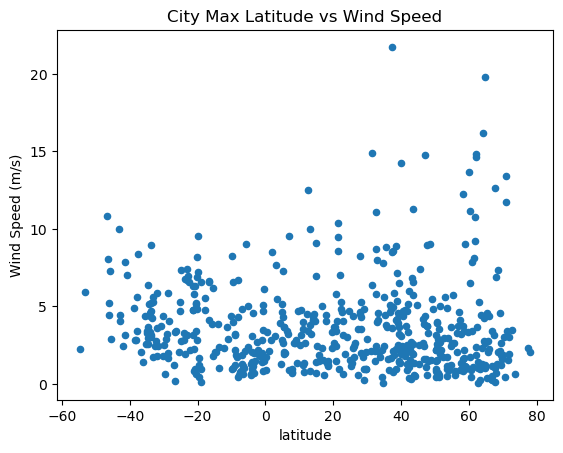

In [27]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter ("Lat","Wind Speed", title = "City Max Latitude vs Wind Speed", xlabel= "latitude", ylabel= "Wind Speed (m/s)")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def create_lin_regression (df, col1, col2, xlabel, ylabel, text_x, text_y):
    
    x=df[col1]
    y=df[col2]
    results= linregress(x,y)
    plt.scatter(x,y)
    plt.plot (x,results.slope*x+results.intercept, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title (f"r:{results.rvalue}")
    plt.text(text_x, text_y,f"y={results.slope:.2f}x+{results.intercept:.2f}",color="red")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bermeo,43.4209,-2.7215,9.93,71,97,6.60,ES,1675641600
1,tuktoyaktuk,69.4541,-133.0374,-38.59,66,20,2.61,CA,1675641600
2,khatanga,71.9667,102.5000,-36.90,100,55,3.00,RU,1675641600
5,kourou,5.1552,-52.6478,23.86,90,99,4.33,GF,1675641600
6,barmer,25.7500,71.3833,16.00,67,0,2.34,IN,1675641600


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,punta arenas,-53.1500,-70.9167,13.06,47,40,5.95,CL,1675641600
4,kaitangata,-46.2817,169.8464,19.24,58,69,8.05,NZ,1675641600
8,rikitea,-23.1203,-134.9692,26.13,75,3,6.69,PF,1675641600
10,arraial do cabo,-22.9661,-42.0278,27.92,78,75,3.15,BR,1675641600
11,kavieng,-2.5744,150.7967,28.34,73,87,2.70,PG,1675641600


###  Temperature vs. Latitude Linear Regression Plot

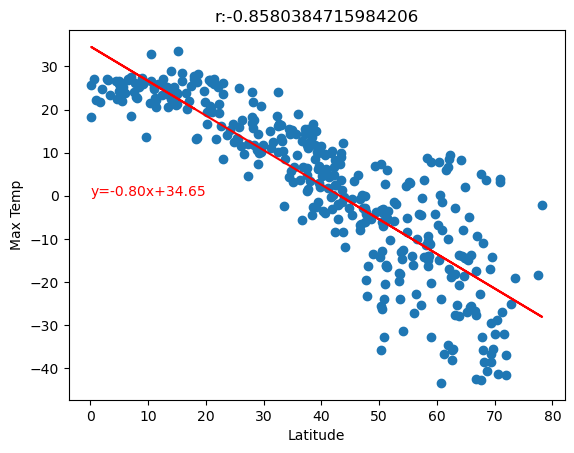

In [50]:
# Linear regression on Northern Hemisphere
create_lin_regression (northern_hemi_df,"Lat","Max Temp", "Latitude","Max Temp",0,0)

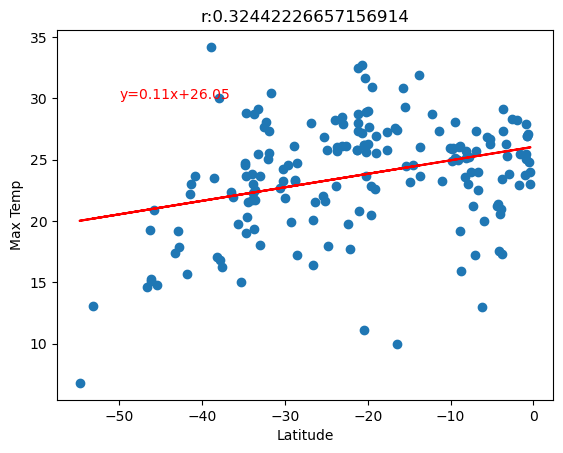

In [51]:
# Linear regression on Southern Hemisphere
create_lin_regression (southern_hemi_df,"Lat","Max Temp", "Latitude","Max Temp",-50,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

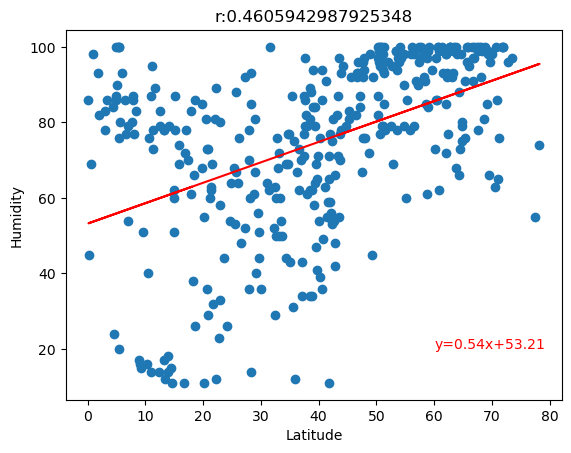

In [53]:
# Northern Hemisphere
create_lin_regression (northern_hemi_df,"Lat","Humidity", "Latitude","Humidity",60,20)

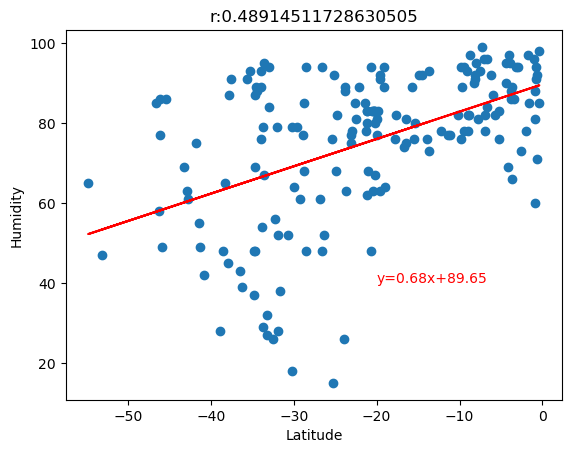

In [56]:
# Southern Hemisphere
create_lin_regression (southern_hemi_df,"Lat","Humidity", "Latitude","Humidity",-20,40)

**Discussion about the linear relationship:** For both Notherns and Southern Hemisphere - R value is higher than 1, so the higher latitude - the bigger humidity value

### Cloudiness vs. Latitude Linear Regression Plot

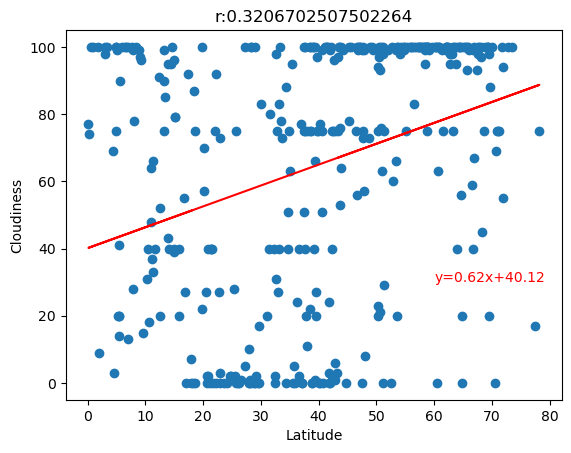

In [59]:
# Northern Hemisphere
create_lin_regression (northern_hemi_df,"Lat","Cloudiness", "Latitude","Cloudiness",60,30)

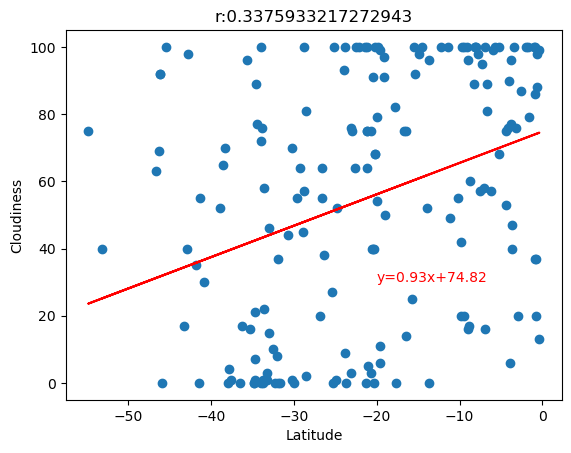

In [62]:
# Southern Hemisphere
create_lin_regression (southern_hemi_df,"Lat","Cloudiness", "Latitude","Cloudiness",-20,30)

**Discussion about the linear relationship:** For both Notherns and Southern Hemisphere - R value is higher than 1, so the higher latitude - the bigger Cloudiness value

### Wind Speed vs. Latitude Linear Regression Plot

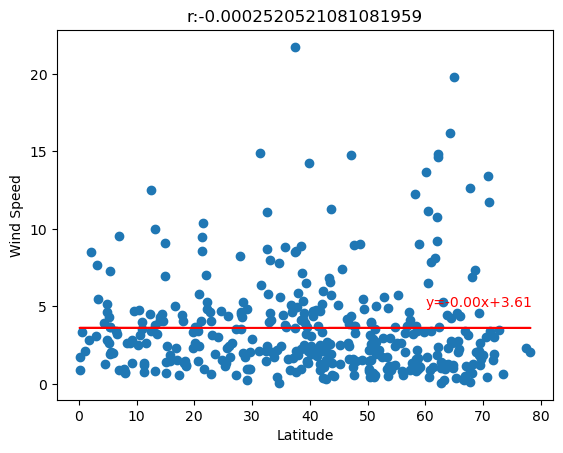

In [64]:
# Northern Hemisphere
create_lin_regression (northern_hemi_df,"Lat","Wind Speed", "Latitude","Wind Speed",60,5)

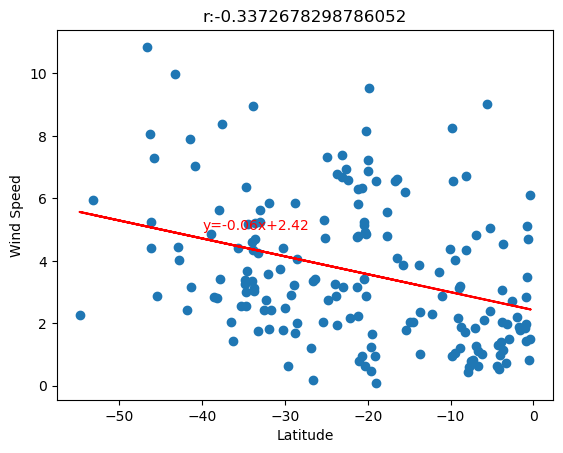

In [66]:
# Southern Hemisphere
create_lin_regression (southern_hemi_df,"Lat","Wind Speed", "Latitude","Wind Speed",-40,5)

**Discussion about the linear relationship:** For both Notherns and Southern Hemisphere - R value is higher than 1, so the higher latitude - the lower winf speed